In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
import plotly.express as px
plt.style.use("ggplot")
sns.set_palette("mako")
from scipy.stats import boxcox
from scipy.stats import spearmanr as sr,chi2_contingency
def getPlotLabels(df,column,splot):
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -12), 
                       textcoords = 'offset points',
                       fontsize="20",
                       fontweight="bold",
                       color="#e9e9e6")
warnings.filterwarnings('ignore')
df=pd.read_csv("Adult_income.csv")
df

age     workclass  final-weight     education  \
0       25       Private        226802          11th   
1       38       Private         89814       HS-grad   
2       28     Local-gov        336951    Assoc-acdm   
3       44       Private        160323  Some-college   
4       18       Private        103497  Some-college   
...    ...           ...           ...           ...   
48837   27       Private        257302    Assoc-acdm   
48838   40       Private        154374       HS-grad   
48839   58       Private        151910       HS-grad   
48840   22       Private        201490       HS-grad   
48841   52  Self-emp-inc        287927       HS-grad   

       educational-num-of-years      marital-status         occupation  \
0                             7       Never-married  Machine-op-inspct   
1                             9  Married-civ-spouse    Farming-fishing   
2                            12  Married-civ-spouse    Protective-serv   
3                            10  Married-civ-spouse  Machine-op-inspct   
4                            10       Never-married       Craft-repair   
...                         ...                 ...                ...   
48837                        12  Married-civ-spouse       Tech-support   
48838                         9  Married-civ-spouse  Machine-op-inspct   
48839                         9             Widowed       Adm-clerical   
48840                         9       Never-married       Adm-clerical   
48841                         9  Married-civ-spouse    Exec-managerial   

      relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
0        Own-child  Black    Male             0             0              40   
1          Husband  White    Male             0             0              50   
2          Husband  White    Male             0             0              40   
3          Husband  Black    Male          7688             0              40   
4        Own-child  White  Female             0             0              30   
...            ...    ...     ...           ...           ...             ...   
48837         Wife  White  Female             0             0              38   
48838      Husband  White    Male             0             0              40   
48839    Unmarried  White  Female             0             0              40   
48840    Own-child  White    Male             0             0              20   
48841         Wife  White  Female         15024             0              40   

      native-country income Numeric_analyser  
0      United-States  <=50K       Male_<=50K  
1      United-States  <=50K       Male_<=50K  
2      United-States   >50K        Male_>50K  
3      United-States   >50K        Male_>50K  
4      United-States  <=50K     Female_<=50K  
...              ...    ...              ...  
48837  United-States  <=50K     Female_<=50K  
48838  United-States   >50K        Male_>50K  
48839  United-States  <=50K     Female_<=50K  
48840  United-States  <=50K       Male_<=50K  
48841  United-States   >50K      Female_>50K  

[48842 rows x 16 columns]

<AxesSubplot:>

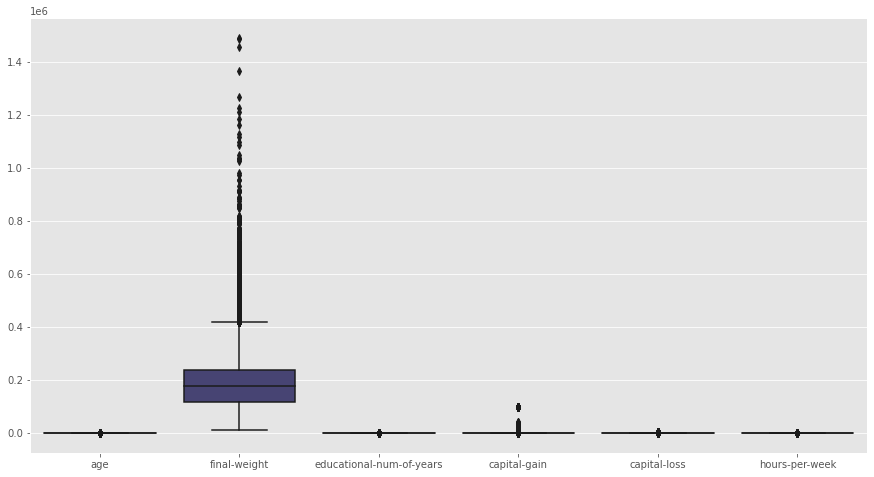

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

so After Looking Over All the boxplots,we know that 
- Age
- final-weight
- capital gain
- capital loss
- hours per week

Lets Transform Age using log and remove the outliers

In [33]:
np.log(7)

1.9459101490553132

In [34]:
2.718281828459045**1.9459101490553132

6.999999999999999

In [35]:
df["age"]=np.log(df["age"])

<AxesSubplot:>

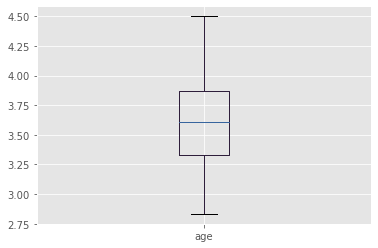

In [36]:
df[["age"]].plot(kind="box")

Lets Now Treat outliers In final-weight

<AxesSubplot:>

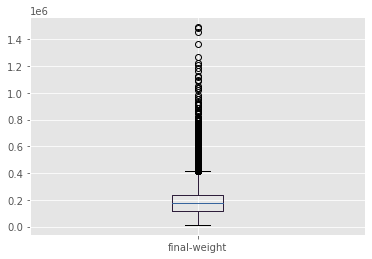

In [37]:
df["final-weight"].plot(kind="box")

In [38]:
limit=np.percentile(df['final-weight'],95)
df=df[df['final-weight'] <= limit]

Lets treat outliers in capital gain and Loss

<AxesSubplot:>

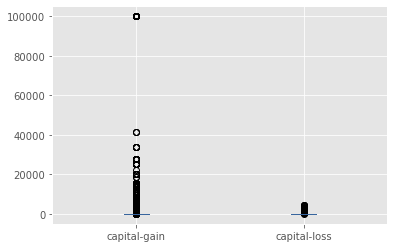

In [39]:
df[["capital-gain","capital-loss"]].plot(kind="box")

We See that two colums have weird distribution,Lets calculate in one column

In [40]:
df["total-capital"]=df["capital-gain"]-df["capital-loss"]

In [41]:
from scipy import stats
df=df[(stats.zscore(df['capital-loss'])>-3) & (stats.zscore(df['capital-loss'])<3)]
df=df[(stats.zscore(df['capital-gain'])>-3) & (stats.zscore(df['capital-gain'])<3)]

<AxesSubplot:>

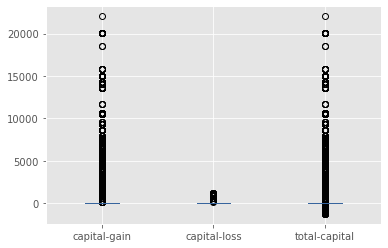

In [42]:
df[["capital-gain","capital-loss","total-capital"]].plot(kind="box")

After merging we understand that,the two colums now have been calculated based on some assumption and now looks little bit good

Lets Now treat Outliers in hours-per-week

In [43]:
df=df[(stats.zscore(df['hours-per-week'])>-3) & (stats.zscore(df['hours-per-week'])<3)]

Lets Encode Our Traget Data but here we will drop the Numeric_analyser bcoz that column was meant for EDA and has no significance and capital gain and loss too as we have calculated the the total capital using profit-loss i.e total price capital.

In [44]:
df.drop(["Numeric_analyser","capital-gain","capital-loss"],axis=1,inplace=True)

In [45]:
from scipy.stats import ttest_ind
np.random.seed(1)
data=df.groupby(["income"]).sample(1000)
for i in df.select_dtypes(["int64","float64"]):
    target_yes = data.loc[data['income']=='<=50K',i]
    target_no = data.loc[data['income']=='>50K',i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs Target => {ttest_results}')

age vs Target => Ttest_indResult(statistic=-15.548741551529652, pvalue=1.5002767700219344e-51)
final-weight vs Target => Ttest_indResult(statistic=-0.22386366116736497, pvalue=0.8228862796107866)
educational-num-of-years vs Target => Ttest_indResult(statistic=-17.972709325866656, pvalue=4.5760076737473646e-67)
hours-per-week vs Target => Ttest_indResult(statistic=-12.925174041163002, pvalue=9.241113615703657e-37)
total-capital vs Target => Ttest_indResult(statistic=-13.219444108282726, pvalue=2.61717075558987e-38)


From aboove we see that final-weight is having low pv,so we drop it

In [46]:
df.drop(["final-weight"],axis=1,inplace=True)

Lets Transform Our Target variables and gender as they have only two categories.Rest we will One hot encode

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['income'] = le.fit_transform(df['income'])

Lets Transform categorical variables

In [48]:
df.select_dtypes(["object"]).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'native-country'],
      dtype='object')

In [49]:
from sklearn.preprocessing import OneHotEncoder as ohc
enc=ohc(drop="first",sparse=False)
encD=enc.fit_transform(df[['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country']])
encD=pd.DataFrame(encD,columns=enc.get_feature_names(df[['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country']].columns))
encD

workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                      0.0                     0.0                1.0   
1                      0.0                     0.0                1.0   
2                      1.0                     0.0                0.0   
3                      0.0                     0.0                1.0   
4                      0.0                     0.0                1.0   
...                    ...                     ...                ...   
43345                  0.0                     0.0                1.0   
43346                  0.0                     0.0                1.0   
43347                  0.0                     0.0                1.0   
43348                  0.0                     0.0                1.0   
43349                  0.0                     0.0                0.0   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
...                       ...                         ...   
43345                     0.0                         0.0   
43346                     0.0                         0.0   
43347                     0.0                         0.0   
43348                     0.0                         0.0   
43349                     1.0                         0.0   

       workclass_State-gov  workclass_Without-pay  education_11th  \
0                      0.0                    0.0             1.0   
1                      0.0                    0.0             0.0   
2                      0.0                    0.0             0.0   
3                      0.0                    0.0             0.0   
4                      0.0                    0.0             0.0   
...                    ...                    ...             ...   
43345                  0.0                    0.0             0.0   
43346                  0.0                    0.0             0.0   
43347                  0.0                    0.0             0.0   
43348                  0.0                    0.0             0.0   
43349                  0.0                    0.0             0.0   

       education_12th  education_1st-4th  ...  native-country_Portugal  \
0                 0.0                0.0  ...                      0.0   
1                 0.0                0.0  ...                      0.0   
2                 0.0                0.0  ...                      0.0   
3                 0.0                0.0  ...                      0.0   
4                 0.0                0.0  ...                      0.0   
...               ...                ...  ...                      ...   
43345             0.0                0.0  ...                      0.0   
43346             0.0                0.0  ...                      0.0   
43347             0.0                0.0  ...                      0.0   
43348             0.0                0.0  ...                      0.0   
43349             0.0                0.0  ...                      0.0   

       native-country_Puerto-Rico  native-country_Scotland  \
0                             0.0                      0.0   
1                             0.0                      0.0   
2                             0.0                      0.0   
3                             0.0                      0.0   
4                             0.0                      0.0   
...                           ...                      ...   
43345                         0.0                      0.0   
43346                         0.0                      0.0   
43347                         0.0                      0.0   
43348                         0.0                      0.0 

In [50]:
df.drop(['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'native-country'],axis=1,inplace=True)

In [51]:
df.reset_index(inplace=True)
encD.reset_index(inplace=True)
df=pd.concat([encD,df],axis=1)

In [52]:
df.drop(["index"],axis=1,inplace=True)

We Have encoded the String values,Lets Now scale numeric columns

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[["educational-num-of-years","hours-per-week","total-capital","age"]] = sc.fit_transform(df[["educational-num-of-years","hours-per-week","total-capital","age"]])
df

workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                      0.0                     0.0                1.0   
1                      0.0                     0.0                1.0   
2                      1.0                     0.0                0.0   
3                      0.0                     0.0                1.0   
4                      0.0                     0.0                1.0   
...                    ...                     ...                ...   
43345                  0.0                     0.0                1.0   
43346                  0.0                     0.0                1.0   
43347                  0.0                     0.0                1.0   
43348                  0.0                     0.0                1.0   
43349                  0.0                     0.0                0.0   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
...                       ...                         ...   
43345                     0.0                         0.0   
43346                     0.0                         0.0   
43347                     0.0                         0.0   
43348                     0.0                         0.0   
43349                     1.0                         0.0   

       workclass_State-gov  workclass_Without-pay  education_11th  \
0                      0.0                    0.0             1.0   
1                      0.0                    0.0             0.0   
2                      0.0                    0.0             0.0   
3                      0.0                    0.0             0.0   
4                      0.0                    0.0             0.0   
...                    ...                    ...             ...   
43345                  0.0                    0.0             0.0   
43346                  0.0                    0.0             0.0   
43347                  0.0                    0.0             0.0   
43348                  0.0                    0.0             0.0   
43349                  0.0                    0.0             0.0   

       education_12th  education_1st-4th  ...  native-country_Trinadad&Tobago  \
0                 0.0                0.0  ...                             0.0   
1                 0.0                0.0  ...                             0.0   
2                 0.0                0.0  ...                             0.0   
3                 0.0                0.0  ...                             0.0   
4                 0.0                0.0  ...                             0.0   
...               ...                ...  ...                             ...   
43345             0.0                0.0  ...                             0.0   
43346             0.0                0.0  ...                             0.0   
43347             0.0                0.0  ...                             0.0   
43348             0.0                0.0  ...                             0.0   
43349             0.0                0.0  ...                             0.0   

       native-country_United-States  native-country_Vietnam  \
0                               1.0                     0.0   
1                               1.0                     0.0   
2                               1.0                     0.0   
3                               1.0                     0.0   
4                               1.0                     0.0   
...                             ...                     ...   
43345                           1.0                     0.0   
43346                           1.0                     0.0   
43347                       

We Have Scaled and Transformed our Data but one thing keep in mind we have an imbalanced data,so we will have to use undersampling or over sampling or any other technique to make it good. So we will use SMOTE bcoz it provides some add info about minority class compared to Under and OverSampler.

In [54]:
from imblearn.over_sampling import SMOTE
X=df.drop(["income"],axis=1)
Y=df["income"]
sm = SMOTE(random_state = 42)
X,Y=sm.fit_resample(X,Y)

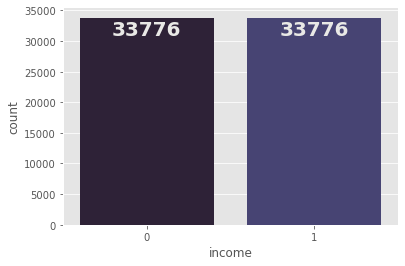

In [55]:
from collections import Counter
ax=sns.countplot(x="income",data=pd.DataFrame(Y))
getPlotLabels(pd.DataFrame(Y),"income",ax)

So Now we see that Using Smote, Our Class Counts have been Balanced.Now Lets Split Data using Train test split and then train models

In [56]:
from sklearn.model_selection import train_test_split as tts
XT,XTS,YT,YTS=tts(X,Y,random_state=42,test_size=0.2)

Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
models=pd.DataFrame({})
lor=LogisticRegression()
lor.fit(XT,YT)
lor_pred_train=lor.predict(XT)
lor_pred_test=lor.predict(XTS)
models=models.append({"MODEL":"LogisticRegression","TRAIN_ACCURACY":accuracy_score(lor_pred_train,YT),"TRAIN_FSCORE":f1_score(lor_pred_train,YT),"TEST_ACCURACY":accuracy_score(lor_pred_test,YTS),"TEST_FSCORE":f1_score(lor_pred_test,YTS)},ignore_index=True)
models

MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
0  LogisticRegression       0.833173     0.839344        0.827982   

   TRAIN_FSCORE  
0      0.832806

Decesion Tree

In [58]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(XT,YT)
dtree_pred_train=dtree.predict(XT)
dtree_pred_test=dtree.predict(XTS)
models=models.append({"MODEL":"DecisionTreeClassifier","TRAIN_ACCURACY":accuracy_score(dtree_pred_train,YT),"TRAIN_FSCORE":f1_score(dtree_pred_train,YT),"TEST_ACCURACY":accuracy_score(dtree_pred_test,YTS),"TEST_FSCORE":f1_score(dtree_pred_test,YTS)},ignore_index=True)

NaiveBayes

In [59]:
nby=GaussianNB()
nby.fit(XT,YT)
nby_pred_train=nby.predict(XT)
nby_pred_test=nby.predict(XTS)
models=models.append({"MODEL":"NaiveBayesClassifier","TRAIN_ACCURACY":accuracy_score(nby_pred_train,YT),"TRAIN_FSCORE":f1_score(nby_pred_train,YT),"TEST_ACCURACY":accuracy_score(nby_pred_test,YTS),"TEST_FSCORE":f1_score(nby_pred_test,YTS)},ignore_index=True)
models

MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
0      LogisticRegression       0.833173     0.839344        0.827982   
1  DecisionTreeClassifier       0.861668     0.861975        0.978553   
2    NaiveBayesClassifier       0.719488     0.771797        0.716493   

   TRAIN_FSCORE  
0      0.832806  
1      0.978409  
2      0.768708

KNN

In [60]:
knn=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(XT,YT)
knn_pred_train=knn.predict(XT)
knn_pred_test=knn.predict(XTS)
models=models.append({"MODEL":"KNeighborsClassifier","TRAIN_ACCURACY":accuracy_score(knn_pred_train,YT),"TRAIN_FSCORE":f1_score(knn_pred_train,YT),"TEST_ACCURACY":accuracy_score(knn_pred_test,YTS),"TEST_FSCORE":f1_score(knn_pred_test,YTS)},ignore_index=True)
models

MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
0      LogisticRegression       0.833173     0.839344        0.827982   
1  DecisionTreeClassifier       0.861668     0.861975        0.978553   
2    NaiveBayesClassifier       0.719488     0.771797        0.716493   
3    KNeighborsClassifier       0.858634     0.866508        0.920542   

   TRAIN_FSCORE  
0      0.832806  
1      0.978409  
2      0.768708  
3      0.923261

GradientBoosting

In [61]:
gbc=GradientBoostingClassifier()
gbc.fit(XT,YT)
gbc_pred_train=gbc.predict(XT)
gbc_pred_test=gbc.predict(XTS)
models=models.append({"MODEL":"GradientBoostingClassifier","TRAIN_ACCURACY":accuracy_score(gbc_pred_train,YT),"TRAIN_FSCORE":f1_score(gbc_pred_train,YT),"TEST_ACCURACY":accuracy_score(gbc_pred_test,YTS),"TEST_FSCORE":f1_score(gbc_pred_test,YTS)},ignore_index=True)

Adaboost Classifier

In [62]:
adb=AdaBoostClassifier()
adb.fit(XT,YT)
adb_pred_train=adb.predict(XT)
adb_pred_test=adb.predict(XTS)
models=models.append({"MODEL":"AdaBoostClassifier","TRAIN_ACCURACY":accuracy_score(adb_pred_train,YT),"TRAIN_FSCORE":f1_score(adb_pred_train,YT),"TEST_ACCURACY":accuracy_score(adb_pred_test,YTS),"TEST_FSCORE":f1_score(adb_pred_test,YTS)},ignore_index=True)
models

MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
0          LogisticRegression       0.833173     0.839344        0.827982   
1      DecisionTreeClassifier       0.861668     0.861975        0.978553   
2        NaiveBayesClassifier       0.719488     0.771797        0.716493   
3        KNeighborsClassifier       0.858634     0.866508        0.920542   
4  GradientBoostingClassifier       0.865369     0.871331        0.860032   
5          AdaBoostClassifier       0.854563     0.858948        0.848763   

   TRAIN_FSCORE  
0      0.832806  
1      0.978409  
2      0.768708  
3      0.923261  
4      0.864924  
5      0.852000

XGBoost

In [63]:
xgb=XGBClassifier()
xgb.fit(XT,YT)
xgb_pred_train=xgb.predict(XT)
xgb_pred_test=xgb.predict(XTS)
models=models.append({"MODEL":"XGBClassifier","TRAIN_ACCURACY":accuracy_score(xgb_pred_train,YT),"TRAIN_FSCORE":f1_score(xgb_pred_train,YT),"TEST_ACCURACY":accuracy_score(xgb_pred_test,YTS),"TEST_FSCORE":f1_score(xgb_pred_test,YTS)},ignore_index=True)
models

[15:56:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
0          LogisticRegression       0.833173     0.839344        0.827982   
1      DecisionTreeClassifier       0.861668     0.861975        0.978553   
2        NaiveBayesClassifier       0.719488     0.771797        0.716493   
3        KNeighborsClassifier       0.858634     0.866508        0.920542   
4  GradientBoostingClassifier       0.865369     0.871331        0.860032   
5          AdaBoostClassifier       0.854563     0.858948        0.848763   
6               XGBClassifier       0.903634     0.905638        0.913010   

   TRAIN_FSCORE  
0      0.832806  
1      0.978409  
2      0.768708  
3      0.923261  
4      0.864924  
5      0.852000  
6      0.914069

RandomForest

In [64]:
rfc=RandomForestClassifier()
rfc.fit(XT,YT)
rfc_pred_train=rfc.predict(XT)
rfc_pred_test=rfc.predict(XTS)
models=models.append({"MODEL":"RandomForestClassifier","TRAIN_ACCURACY":accuracy_score(rfc_pred_train,YT),"TRAIN_FSCORE":f1_score(rfc_pred_train,YT),"TEST_ACCURACY":accuracy_score(rfc_pred_test,YTS),"TEST_FSCORE":f1_score(rfc_pred_test,YTS)},ignore_index=True)
models

MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
0          LogisticRegression       0.833173     0.839344        0.827982   
1      DecisionTreeClassifier       0.861668     0.861975        0.978553   
2        NaiveBayesClassifier       0.719488     0.771797        0.716493   
3        KNeighborsClassifier       0.858634     0.866508        0.920542   
4  GradientBoostingClassifier       0.865369     0.871331        0.860032   
5          AdaBoostClassifier       0.854563     0.858948        0.848763   
6               XGBClassifier       0.903634     0.905638        0.913010   
7      RandomForestClassifier       0.887425     0.888954        0.978516   

   TRAIN_FSCORE  
0      0.832806  
1      0.978409  
2      0.768708  
3      0.923261  
4      0.864924  
5      0.852000  
6      0.914069  
7      0.978589

In [65]:
models["REMARK"]=["G","U","G","U","G","G","G","U"]

In [66]:
models.sort_values(['TEST_ACCURACY', 'TRAIN_ACCURACY'],ascending=False)

MODEL  TEST_ACCURACY  TEST_FSCORE  TRAIN_ACCURACY  \
6               XGBClassifier       0.903634     0.905638        0.913010   
7      RandomForestClassifier       0.887425     0.888954        0.978516   
4  GradientBoostingClassifier       0.865369     0.871331        0.860032   
1      DecisionTreeClassifier       0.861668     0.861975        0.978553   
3        KNeighborsClassifier       0.858634     0.866508        0.920542   
5          AdaBoostClassifier       0.854563     0.858948        0.848763   
0          LogisticRegression       0.833173     0.839344        0.827982   
2        NaiveBayesClassifier       0.719488     0.771797        0.716493   

   TRAIN_FSCORE REMARK  
6      0.914069      G  
7      0.978589      U  
4      0.864924      G  
1      0.978409      U  
3      0.923261      U  
5      0.852000      G  
0      0.832806      G  
2      0.768708      G

From Aboove We See that <font color="green">XGboost</font> has Highest Accuracy in all Models which fit well

<B><I>SO IF WE WANT TO PREDICT VALUE FOR OUR INPUTS THROUGH USERS POINT OF VIEW,THE USER WOULD ENTER BELOW ARRAY, IN REAL WORLD MORE COMPRESSION TECHNIQUE ARE APPLIED TO SELECT RELEVANT FEATURES AS INPUTS USING VARIETY OF FEATURE ELIMINATION TECHNIQUES DEPENING ON NEEDS AND USER WILL HAVE FEW INPUT FIELDS AND GET THE PREDICTION WHEN COLUMNS DECREASE. SO THE BELOW IS A EXAMPLE RANDOMLY TAKEN WHICH WILL BE GIVEN AS INPUT,JUST ASSUME A INPUT IS GIVEN BELOW</I></B>

In [120]:
input_value=np.array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.60417817,
         1.17177523,  1.        ,  0.46140961, -0.24258564]]).reshape(1,-1)
input_value

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [126]:
print(f"The Candidate Has Income {le.inverse_transform(xgb.predict(input_value))[0]}")

The Candidate Has Income >50K


<i><b><font color="navy">So aboove Is Our</font><font color="blue"> Income prediction with given Input and Thats Income</font> ><font color="green"><u>50K</u></font></b></i>